In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
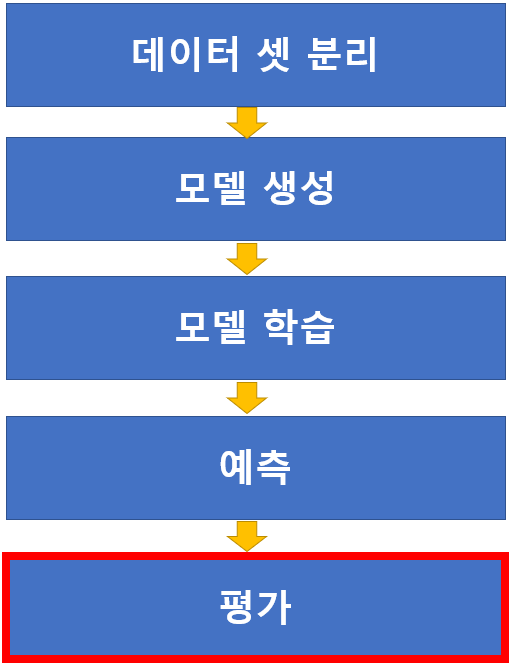

## 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP
1. ROC, AUC

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

##  양성과 음성
- 양성(Positive): 모델이 찾으려는 주 대상
- 음성(Negative): 모델이 찾으려는 주 대상이 아닌 것
- 예
    - 환자 분류 
        - 양성 - 환자, 음성 - 정상인
    - 스팸메일 분류 
        - 양성 - 스팸메일, 음성 - 정상메일
    - 금융사기 모델
        - 양성 - 사기거래, 음성 - 정상거래
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 양성(Positive)에 대한 지표만 확인 할수 없다. 
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [3]:
digits = load_digits() # 8*8 = 64 pixel => flatten data로 제공
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.feature_names[:10] # 이미지 좌표 (pixel명) [(0, 0), (0, 1), ... (0, 7), (1, 0)...]

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1']

In [5]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

##### label의 클래스별 빈도수 확인

In [6]:
np.unique(y, return_counts=True) # (고유값 배열(0~9까지의 숫자), 각 숫자의 개수)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

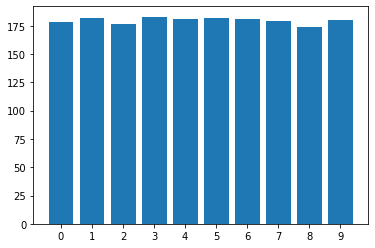

In [7]:
plt.bar(np.unique(y, return_counts=True)[0], np.unique(y, return_counts=True)[1])
plt.xticks(range(10))
plt.show()

##### image 확인

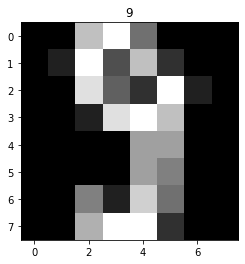

In [8]:
img_idx = 125 # 보려는 그림의 인덱스
img = X[img_idx].reshape(8, 8) # 1차원인 이미지 배열을 다시 2차원(8*8)으로 변경 
plt.imshow(img, cmap='gray') # imshow : 이미지 보기 위한 함수

plt.title(y[img_idx])
# plt.xticks([])
# plt.yticks([])
plt.show()

In [9]:
img

array([[ 0.,  0., 12., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 16.,  5., 12.,  3.,  0.,  0.],
       [ 0.,  0., 14.,  6.,  3., 16.,  2.,  0.],
       [ 0.,  0.,  2., 14., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  8.,  0.,  0.],
       [ 0.,  0.,  8.,  2., 13.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16.,  3.,  0.,  0.]])

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [10]:
np.where(y==9) # 조건이 true인 index 출력

(array([   9,   19,   29,   31,   37,   39,   69,   73,   92,  105,  119,
         125,  128,  139,  149,  159,  161,  167,  169,  199,  203,  220,
         233,  251,  254,  265,  275,  285,  287,  293,  295,  325,  329,
         348,  361,  375,  381,  384,  395,  405,  415,  417,  423,  425,
         455,  459,  478,  491,  505,  511,  514,  525,  535,  545,  547,
         553,  555,  585,  589,  608,  621,  635,  641,  644,  655,  665,
         675,  677,  683,  685,  715,  719,  738,  751,  765,  771,  774,
         785,  795,  805,  807,  813,  815,  845,  849,  868,  881,  895,
         901,  904,  914,  924,  934,  936,  942,  944,  971,  975,  993,
        1006, 1020, 1024, 1027, 1038, 1048, 1058, 1060, 1066, 1068, 1096,
        1100, 1119, 1132, 1146, 1152, 1155, 1166, 1176, 1186, 1188, 1194,
        1196, 1226, 1230, 1249, 1262, 1276, 1282, 1285, 1296, 1306, 1316,
        1318, 1324, 1326, 1356, 1360, 1379, 1392, 1406, 1412, 1424, 1434,
        1444, 1446, 1452, 1454, 1484, 

In [11]:
y = np.where(y==9, 1, 0) # 조건이 true = 1 변환, false = 0 변환
y

array([0, 0, 0, ..., 0, 1, 0])

In [12]:
y_pct = np.unique(y, return_counts=True)
y_pct

(array([0, 1]), array([1617,  180], dtype=int64))

In [13]:
# 0과 1의 비율
y_pct[1]/y.size # 배열.size = 원소 개수

array([0.89983306, 0.10016694])

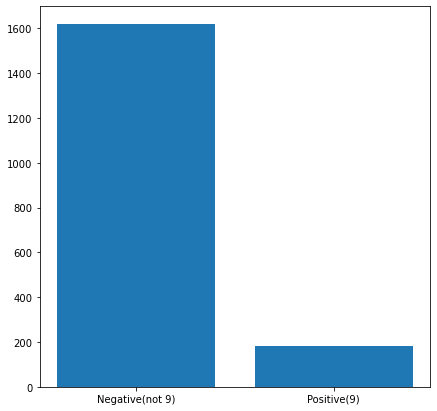

In [14]:
plt.figure(figsize=(7,7))
plt.bar(y_pct[0], y_pct[1])
plt.xticks([0,1], labels=['Negative(not 9)','Positive(9)']) 
plt.show()

### 데이터셋 분할
- train/test 로 분할

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=157)
print(np.unique(y_train, return_counts=True)[1]/y_train.size)
print(np.unique(y_test, return_counts=True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


### 모델 생성 및 학습

#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [16]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [17]:
# y중 빈도수가 가장 높은 class로 무조건 예측
dummy_model = DummyClassifier(strategy='most_frequent')

dummy_model.fit(X_train, y_train)

pred_train_dummy = dummy_model.predict(X_train)
pred_test_dummy = dummy_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train_dummy)
test_acc = accuracy_score(y_test, pred_test_dummy)
print(f"훈련데이터 정확도 {train_acc}, 테스트데이터 정확도: {test_acc}") 

훈련데이터 정확도 0.8997772828507795, 테스트데이터 정확도: 0.9


아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

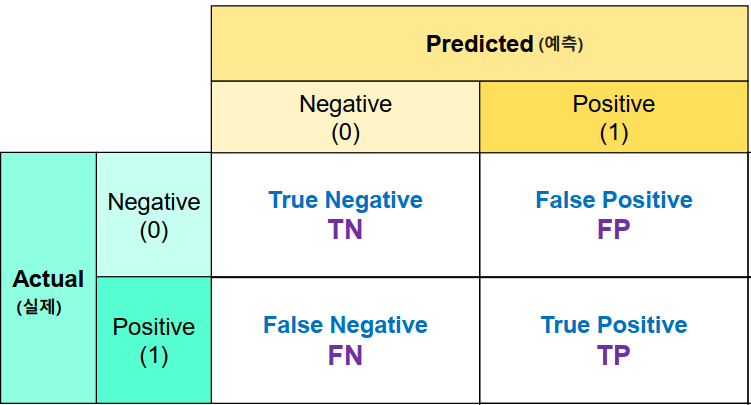

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

### 양성(Positive) 예측력 측정 평가지표
- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPF) = \cfrac{FP}{TN+FP}$

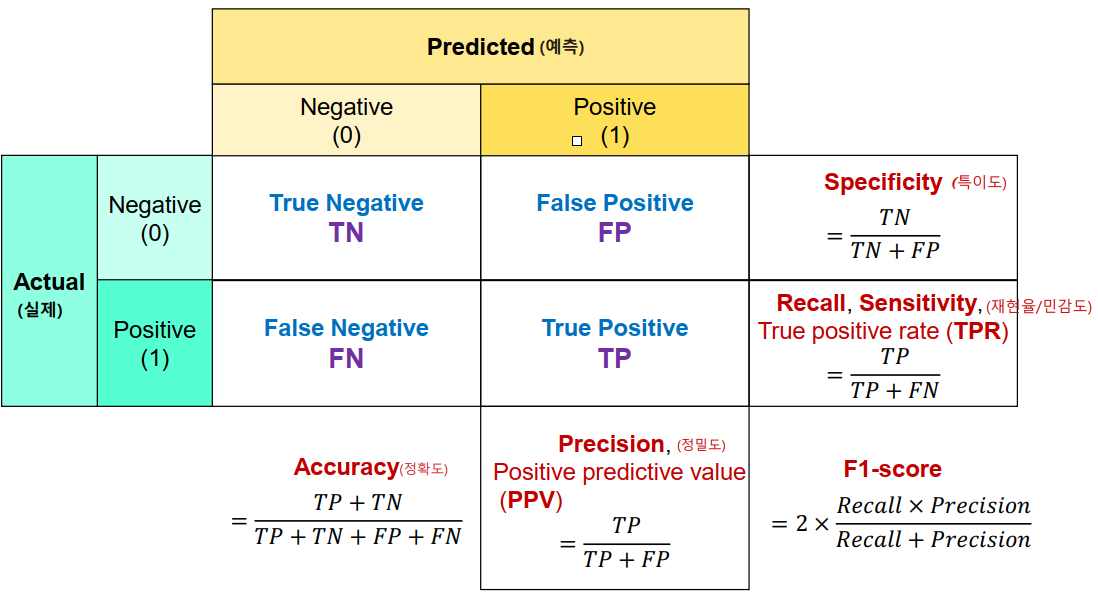

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값)/plot_confusion_matrix()**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [19]:
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train_dummy))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test_dummy))

Train confusion matrix
[[1212    0]
 [ 135    0]]
--------------------------------------------------
Test confusion matrix
[[405   0]
 [ 45   0]]


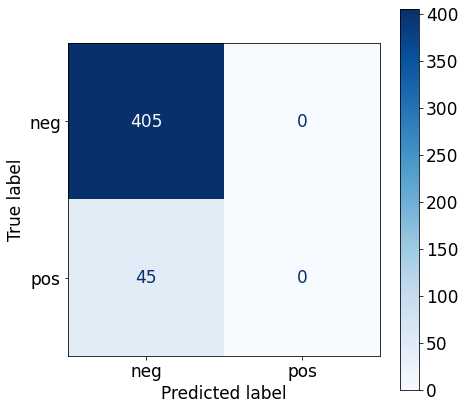

In [20]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 17
_, ax = plt.subplots(1, 1, figsize=(7, 7))
plot_confusion_matrix(dummy_model, 
                        X_test,  # X
                        y_test,  # y
                        display_labels=['neg', 'pos'],
                        cmap=plt.cm.Blues,
                        values_format='d', # 숫자 format, d = 정수
                        ax=ax)

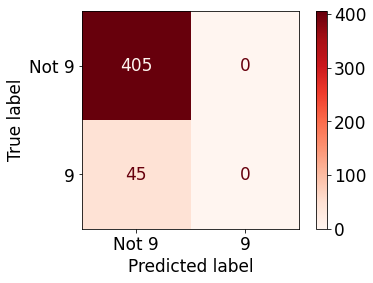

In [21]:
# 현재 바뀐 방법
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test_dummy)
disp = ConfusionMatrixDisplay(cm, # confusion matrix
                            display_labels=['Not 9', '9']) # [Negative label, Positive label]
disp.plot(cmap='Reds') # 출력

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [22]:
print("Accuracy")
accuracy_score(y_train, pred_train_dummy), accuracy_score(y_test, pred_test_dummy)

Accuracy


(0.8997772828507795, 0.9)

In [23]:
print("Recall") 
recall_score(y_train, pred_train_dummy), recall_score(y_test, pred_test_dummy)

Recall


(0.0, 0.0)

In [24]:
print('Precision')
precision_score(y_train, pred_train_dummy), precision_score(y_test, pred_test_dummy)

Precision


(0.0, 0.0)

In [25]:
print('f1 score')
f1_score(y_train, pred_train_dummy), f1_score(y_test, pred_test_dummy)

f1 score


(0.0, 0.0)

### TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용(max_depth=3)
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score

# model 생성 및 학습
model = DecisionTreeClassifier(max_depth=3,
                                random_state=157)

forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=157)

model.fit(X_train, y_train)
forest.fit(X_train, y_train)

# predict
pred_train_tree = model.predict(X_train)
pred_test_tree = model.predict(X_test)

pred_train_forest = forest.predict(X_train)
pred_test_forest = forest.predict(X_test)

In [27]:
cm_train_tree = confusion_matrix(y_train, pred_train_tree)
cm_test_tree = confusion_matrix(y_test, pred_test_tree)

cm_train_tree, cm_test_tree

(array([[1170,   42],
        [  29,  106]], dtype=int64),
 array([[392,  13],
        [  5,  40]], dtype=int64))

In [28]:
cm_train_forest = confusion_matrix(y_train, pred_train_forest)
cm_test_forest = confusion_matrix(y_test, pred_test_forest)

cm_train_forest, cm_test_forest

(array([[1212,    0],
        [  95,   40]], dtype=int64),
 array([[405,   0],
        [ 30,  15]], dtype=int64))

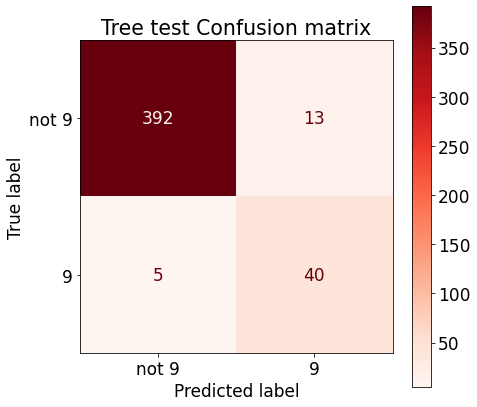

In [29]:
def display_cm(y, pred, title):
    """
    Confusion Matrix 시각화 함수
    [Parameter]
    y : target (ndarray)
    pred : model prediction (ndarray)
    title : graph title (str)
    """
    cm_test_tree = confusion_matrix(y, pred)
    plt.figure(figsize=(7, 7))
    ax = plt.gca()
    disp = ConfusionMatrixDisplay(cm_test_tree, display_labels=['not 9', '9'])
    disp.plot(cmap='Reds', ax=ax)
    plt.title(f'{title} Confusion matrix')

display_cm(y_test, pred_test_tree, 'Tree test')    

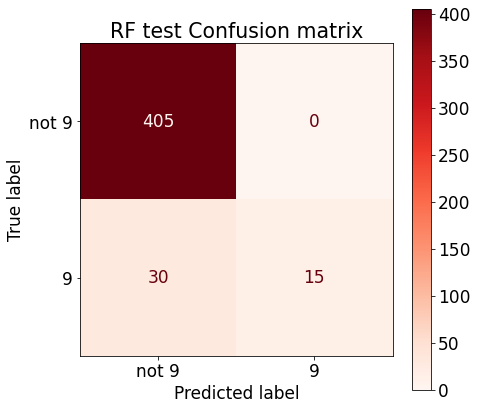

In [30]:
display_cm(y_test, pred_test_forest, 'RF test')

In [31]:
# 평가 지표 출력 함수
def print_metrics_classifier(y, pred, title):
    """
    accuracy, recall, precision, f1 출력하는 함수
    [parameter]
    y : target (ndarray)
    pred : prediction (ndarray)
    title : (str)
    [Return]
    [Exception]
    """
    print(title)
    print('정확도(Accuracy): ', accuracy_score(y, pred))
    print('재현률(Recall): ', recall_score(y, pred))
    print('정밀도(Precision): ', precision_score(y, pred))
    print('f1 score: ', f1_score(y, pred))
    print()

print_metrics_classifier(y_train, pred_train_tree, 'tree train')
print_metrics_classifier(y_test, pred_test_tree, 'tree test')

tree train
정확도(Accuracy):  0.947290274684484
재현률(Recall):  0.7851851851851852
정밀도(Precision):  0.7162162162162162
f1 score:  0.7491166077738516

tree test
정확도(Accuracy):  0.96
재현률(Recall):  0.8888888888888888
정밀도(Precision):  0.7547169811320755
f1 score:  0.8163265306122449



In [32]:
print_metrics_classifier(y_train, pred_train_forest, 'rf train')
print_metrics_classifier(y_test, pred_test_forest, 'rf test')

rf train
정확도(Accuracy):  0.9294729027468448
재현률(Recall):  0.2962962962962963
정밀도(Precision):  1.0
f1 score:  0.45714285714285713

rf test
정확도(Accuracy):  0.9333333333333333
재현률(Recall):  0.3333333333333333
정밀도(Precision):  1.0
f1 score:  0.5



In [33]:
acc_train = accuracy_score(y_train, pred_train_tree)
acc_test = accuracy_score(y_test, pred_test_tree)

acc_train_forest = accuracy_score(y_train, pred_train_forest)
acc_test_forest = accuracy_score(y_test, pred_test_forest)

print("Accuracy")
print(acc_train, acc_test)
print('-'*30)
print(acc_train_forest, acc_test_forest)

Accuracy
0.947290274684484 0.96
------------------------------
0.9294729027468448 0.9333333333333333


In [34]:
print('Recall (sensitivity)')
recall_train = recall_score(y_train, pred_train_tree)
recall_test = recall_score(y_test, pred_test_tree)

print(recall_train, recall_test)

print('-'*50)

print('Precision')
precision_score_train = precision_score(y_train, pred_train_tree)
precision_score_test = precision_score(y_test, pred_test_tree)
print(precision_score_train, precision_score_test)

print('-'*50)

print('f1 score')
print(f1_score(y_train, pred_train_tree), f1_score(y_test, pred_test_tree))

Recall (sensitivity)
0.7851851851851852 0.8888888888888888
--------------------------------------------------
Precision
0.7162162162162162 0.7547169811320755
--------------------------------------------------
f1 score
0.7491166077738516 0.8163265306122449


In [35]:
print('Recall (sensitivity)')
recall_train = recall_score(y_train, pred_train_forest)
recall_test = recall_score(y_test, pred_test_forest)

print(recall_train, recall_test)

print('-'*50)

print('Precision')
precision_score_train = precision_score(y_train, pred_train_forest)
precision_score_test = precision_score(y_test, pred_test_forest)
print(precision_score_train, precision_score_test)

print('-'*50)

print('f1 score')
print(f1_score(y_train, pred_train_forest), f1_score(y_test, pred_test_forest))

Recall (sensitivity)
0.2962962962962963 0.3333333333333333
--------------------------------------------------
Precision
1.0 1.0
--------------------------------------------------
f1 score
0.45714285714285713 0.5


### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [36]:
from sklearn.metrics import classification_report

result = classification_report(y_test, # target
                               pred_test_forest, # predict
                               target_names=['pos(not 9)', 'pos(9)']) # 0과 1의 label
print(result)    

              precision    recall  f1-score   support

  pos(not 9)       0.93      1.00      0.96       405
      pos(9)       1.00      0.33      0.50        45

    accuracy                           0.93       450
   macro avg       0.97      0.67      0.73       450
weighted avg       0.94      0.93      0.92       450



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 초점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

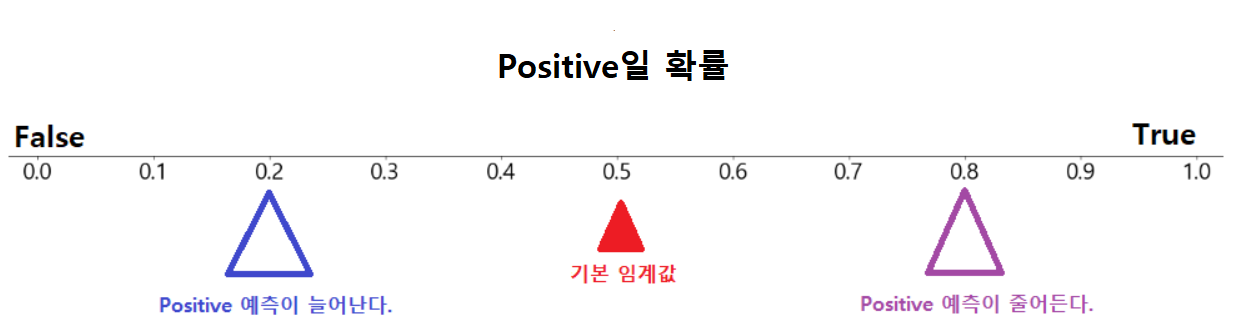

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [37]:
model.predict_proba(X_test)[:5] # 확률로 표현

array([[0.98676957, 0.01323043],
       [0.98676957, 0.01323043],
       [0.98676957, 0.01323043],
       [0.25409836, 0.74590164],
       [0.98676957, 0.01323043]])

In [38]:
model.predict(X_test)[:5]

array([0, 0, 0, 1, 0])

##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [39]:
from sklearn.metrics import precision_recall_curve

pos_proba = model.predict_proba(X_test)[:, 1] # 1(positive)일 확률에 대한 열 추출 (450, 2)
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
# thresholds가 변화할 때, predict의 변화

print(precisions.shape, recalls.shape, thresholds.shape) 
# thresholds는 마지막 1을 생략해서 return하기에 shape 1 작음, precisions와 recalls는 1에대한 결과 포함

(9,) (9,) (8,)


In [40]:
thresholds = np.append(thresholds, 1) # thresholds에 1을 추가

print(precisions.shape, recalls.shape, thresholds.shape)

(9,) (9,) (9,)


In [41]:
import pandas as pd

pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions,
    'recall':recalls
})

,threshold,precision,recall
0,0.006711,0.100000,1.000000
1,0.013230,0.110000,0.977778
2,0.035714,0.439560,0.888889
3,0.038462,0.493827,0.888889
4,0.170213,0.563380,0.888889
5,0.312500,0.689655,0.888889
6,0.576923,0.754717,0.888889
7,0.745902,0.808511,0.844444
8,1.000000,1.000000,0.000000


###### plotting

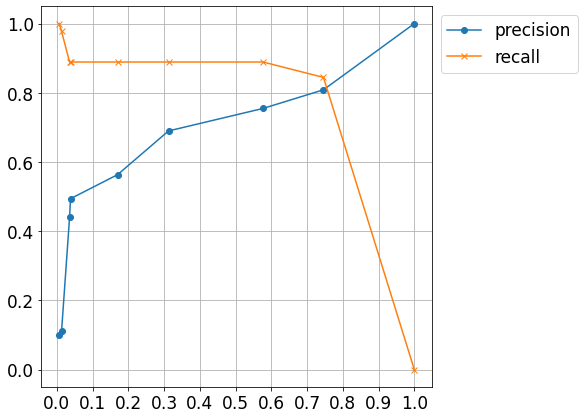

In [42]:
plt.figure(figsize=(7,7))

# x : thresholds
plt.plot(thresholds, precisions, marker='o', label='precision') # y : precisions
plt.plot(thresholds, recalls, marker='x', label='recall') # y : recall

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
# bbox_to_anchor: box의 좌표(기준)값에 따른 legend 위치 지정
plt.show()

### Binarizer - 임계값 변경
- Transformer로 설정한 임계점 보다 작으거나 같으면 0, 크면 1로 변환하는 변환기
- Binarizer를 이용해 원하는 임계값을 설정하여 양성/음성 분류기준을 변경할 수 있다.

##### Binarizer 간단 예제

In [43]:
from sklearn.preprocessing import Binarizer

In [44]:
exam = [[0.3, 0.7, 0.4, 0.6, 0.5]]

# 0.1 이하 : 0, 초과 : 1 return
# binarizer = Binarizer(threshold=0.1)

# 0.5 이하 : 0, 초과 : 1 return 
# binarizer = Binarizer(threshold=0.5)

# 0.6 이하 : 0, 초과 : 1 return 
binarizer = Binarizer(threshold=0.6)

binarizer.fit_transform(exam) 

array([[0., 1., 0., 0., 0.]])

In [45]:
# 유사한 방법
exam = np.array(exam)
th = 0.6
np.where(exam <= th, 0, 1)

array([[0, 1, 0, 0, 0]])

##### 모델 예측 결과에 적용

In [46]:
binarizer1 = Binarizer(threshold=0.1) 
binarizer2 = Binarizer(threshold=0.4) 
pred_proba = model.predict_proba(X_test)

# [:, 1] : 1 (positive) 일 때의 확률 값 가져오기
pred_test_tree2 = binarizer1.fit_transform(pred_proba)[:, 1] 
pred_test_tree3 = binarizer2.fit_transform(pred_proba)[:, 1]  

print('결정트리 - 임계값(0.1)')
print(recall_score(y_test, pred_test_tree2), precision_score(y_test, pred_test_tree2))
print('결정트리 - 임계값(0.4)')
print(recall_score(y_test, pred_test_tree3), precision_score(y_test, pred_test_tree3))

결정트리 - 임계값(0.1)
0.8888888888888888 0.5633802816901409
결정트리 - 임계값(0.4)
0.8888888888888888 0.7547169811320755


In [47]:
# 상황에 따라 필요한 것을 이용하여 th 조절
print_metrics_classifier(y_test, pred_test_tree2, 'th = 0.1')
print_metrics_classifier(y_test, pred_test_tree3, 'th = 0.4')

th = 0.1
정확도(Accuracy):  0.92
재현률(Recall):  0.8888888888888888
정밀도(Precision):  0.5633802816901409
f1 score:  0.689655172413793

th = 0.4
정확도(Accuracy):  0.96
재현률(Recall):  0.8888888888888888
정밀도(Precision):  0.7547169811320755
f1 score:  0.8163265306122449



## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- Positive 확률 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
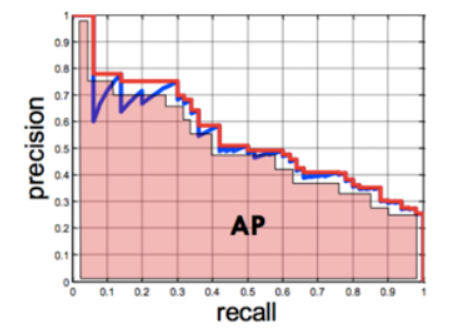   

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, average_precision_score

# decision tree / random forest 모델을 이용해 positive 확률
tree_pos = model.predict_proba(X_test)[:, 1]
rfc_pos= forest.predict_proba(X_test)[:, 1]

precision1, recall1, threshold1 = precision_recall_curve(y_test, tree_pos) # (target, pos 확률)
precision2, recall2, threshold2 = precision_recall_curve(y_test, rfc_pos) # (target, pos 확률)

print(precision1.shape, recall1.shape, threshold1.shape)

(9,) (9,) (8,)


In [49]:
print(recall1)
print(precision1)
print(threshold1)

[1.         0.97777778 0.88888889 0.88888889 0.88888889 0.88888889
 0.88888889 0.84444444 0.        ]
[0.1        0.11       0.43956044 0.49382716 0.56338028 0.68965517
 0.75471698 0.80851064 1.        ]
[0.00671141 0.01323043 0.03571429 0.03846154 0.17021277 0.3125
 0.57692308 0.74590164]


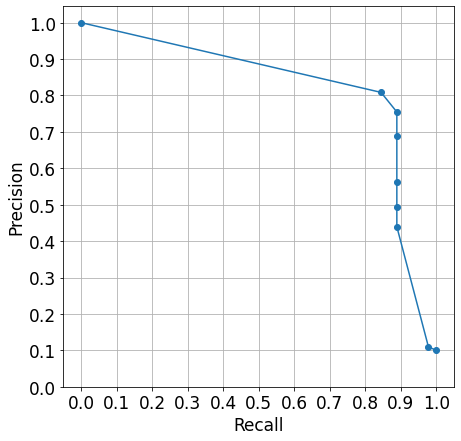

In [50]:
plt.figure(figsize=(7, 7))
# threshold1
plt.plot(recall1, precision1, marker='o') # x : recall 변화, y : precision 변화

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [51]:
# precision recall curve를 점수화(정량화)
average_precision_score(y_test, tree_pos) # (target, pos 확률)

0.7282852937240732

In [52]:
from sklearn.metrics import plot_precision_recall_curve

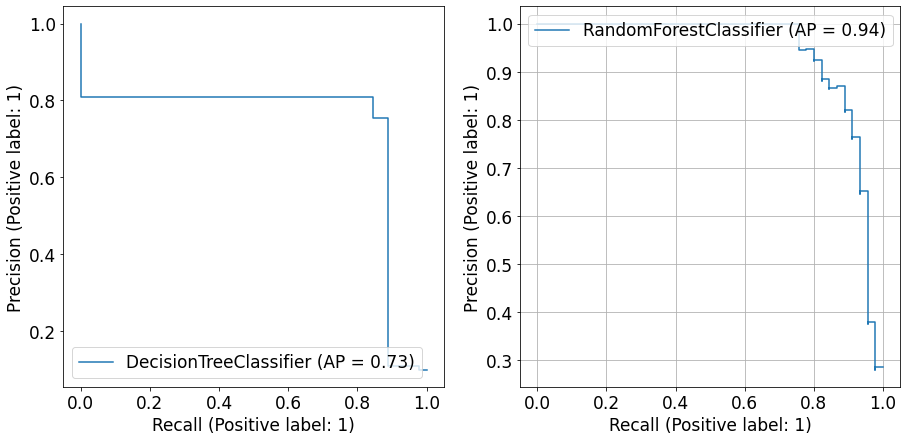

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plot_precision_recall_curve(model, X_test, y_test, ax=ax[0]) 
plot_precision_recall_curve(forest, X_test, y_test, ax=ax[1]) 
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

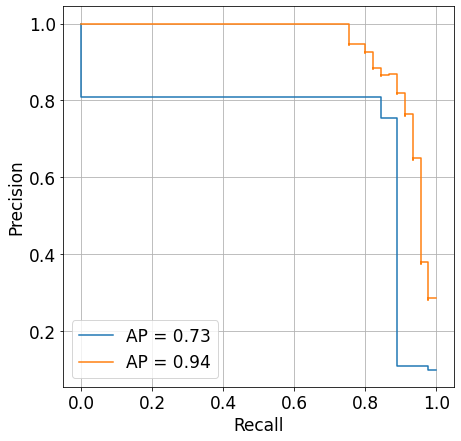

In [54]:
# sklearn 에서 새로 사용하는 방식
from sklearn.metrics import PrecisionRecallDisplay

ap_tree = average_precision_score(y_test, tree_pos)
ap_rfc = average_precision_score(y_test, rfc_pos)
disp1 = PrecisionRecallDisplay(precision1, recall1, average_precision=ap_tree)
disp2 = PrecisionRecallDisplay(precision2, recall2, average_precision=ap_rfc)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax = plt.gca()
disp1.plot(ax=ax)
disp2.plot(ax=ax)
plt.grid()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율_Fall out)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도_Recall)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

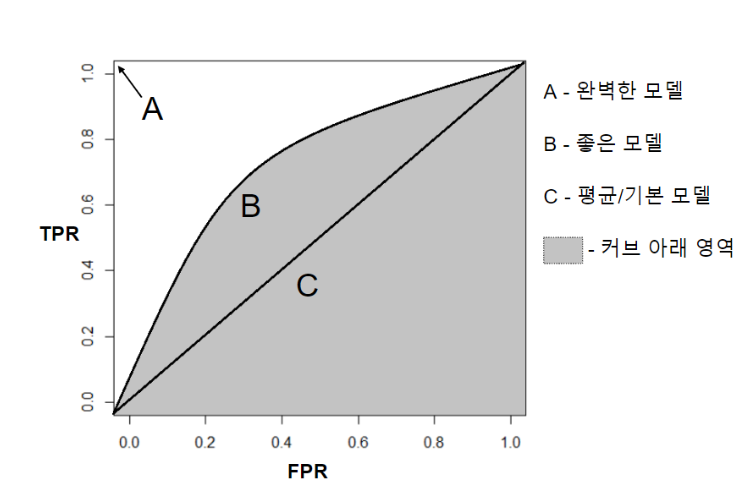

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

## ROC Curve - Precision_Recall Curve
- ROC Curve
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- Precision Recall curve
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

tree_pos = model.predict_proba(X_test)[:, 1]
rfc_pos= forest.predict_proba(X_test)[:, 1]

fprs_tree, tprs_tree, thresholds_tree = roc_curve(y_test, tree_pos)
fprs_rfc, tprs_rfc, thresholds_rfc = roc_curve(y_test, rfc_pos)

print(fprs_tree.shape, tprs_tree.shape, thresholds_tree.shape)
print(fprs_rfc.shape, tprs_rfc.shape, thresholds_rfc.shape)

(8,) (8,) (8,)
(22,) (22,) (22,)


In [58]:
pd.DataFrame({
    "Threshold":thresholds_tree,
    "FPR": fprs_tree,
    "TPR": tprs_tree
})

,Threshold,FPR,TPR
0,1.745902,0.000000,0.000000
1,0.745902,0.022222,0.844444
2,0.576923,0.032099,0.888889
3,0.312500,0.044444,0.888889
4,0.170213,0.076543,0.888889
5,0.035714,0.125926,0.888889
6,0.013230,0.879012,0.977778
7,0.006711,1.000000,1.000000


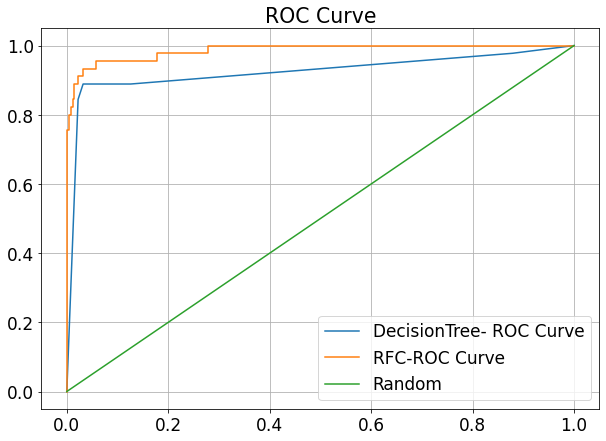

In [59]:
plt.figure(figsize=(10,7))
plt.plot(fprs_tree, tprs_tree, label='DecisionTree- ROC Curve')
plt.plot(fprs_rfc, tprs_rfc, label='RFC-ROC Curve')
plt.plot([0, 1], [0, 1], label='Random') # 일직선 line 생성

plt.legend(loc='lower right')
plt.grid(True)
plt.title('ROC Curve')
plt.show()

In [60]:
# roc auc score
from sklearn.metrics import roc_auc_score
print("DecisionTree roc auc점수:", roc_auc_score(y_test, tree_pos))
print("RandomForest roc auc점수:", roc_auc_score(y_test, rfc_pos))

DecisionTree roc auc점수: 0.9238683127572018
RandomForest roc auc점수: 0.9860631001371742


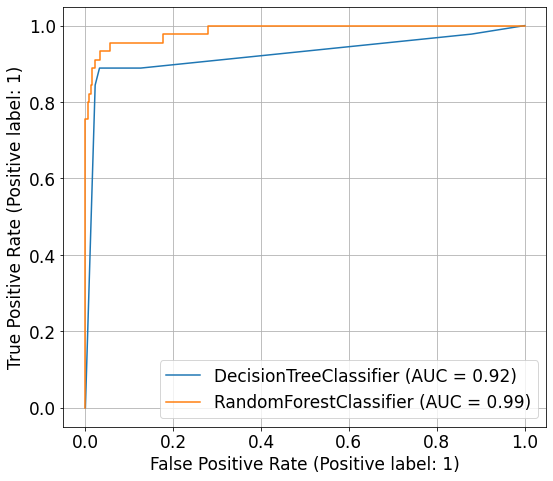

In [65]:
# plot_roc_curve
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
plot_roc_curve(model, X_test, y_test, ax=ax)
plot_roc_curve(forest, X_test, y_test, ax=ax)

plt.tight_layout()
plt.grid()
plt.show()

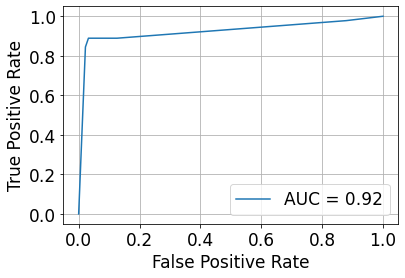

In [72]:
from sklearn.metrics import RocCurveDisplay
auc = roc_auc_score(y_test, tree_pos)
disp = RocCurveDisplay(fpr=fprs_tree, tpr=tprs_tree, roc_auc=auc)
disp.plot()
plt.grid()

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [7]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=157,
                                                    stratify=y)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# model train
tree = DecisionTreeClassifier(max_depth=3, random_state=157)
rf = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=157)

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

pred_train_tree = tree.predict(X_train)
pred_train_rf = rf.predict(X_train)
pred_test_tree = tree.predict(X_test)
pred_test_rf = rf.predict(X_test)

In [18]:
# validation
print(accuracy_score(y_train, pred_train_tree),
accuracy_score(y_train, pred_train_rf),
accuracy_score(y_test, pred_test_tree),
accuracy_score(y_test, pred_test_rf))

0.9824175824175824 0.967032967032967 0.9298245614035088 0.9473684210526315


In [21]:
from sklearn.metrics import classification_report

result_tree = classification_report(y_test,
                                pred_test_rf,
                                target_names=['neg (0)', 'pos(1)'])
print(result_tree)

              precision    recall  f1-score   support

     neg (0)       0.95      0.90      0.93        42
      pos(1)       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [23]:
from sklearn.metrics import precision_recall_curve

pos_proba1 = tree.predict_proba(X_test)[:, 1]
pos_proba2 = rf.predict_proba(X_test)[:, 1]
precision1, recall1, threshold1 = precision_recall_curve(y_test, pos_proba1)
precision2, recall2, threshold2 = precision_recall_curve(y_test, pos_proba2)

print(precision1.shape, recall1.shape, threshold1.shape)
print(precision2.shape, recall2.shape, threshold2.shape)

(5,) (5,) (4,)
(60,) (60,) (59,)


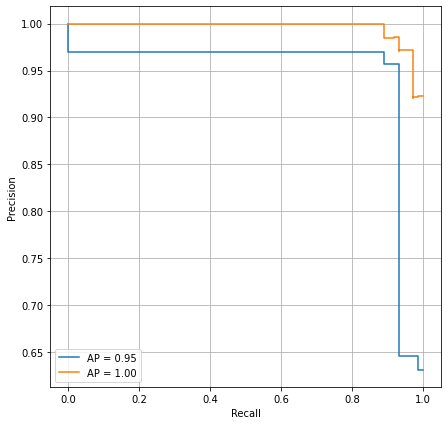

In [29]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

ap_tree = average_precision_score(y_test, pos_proba1)
ap_rf = average_precision_score(y_test, pos_proba2)
disp1 = PrecisionRecallDisplay(precision1, recall1, average_precision=ap_tree)
disp2 = PrecisionRecallDisplay(precision2, recall2, average_precision=ap_rf)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax = plt.gca()
disp1.plot(ax=ax)
disp2.plot(ax=ax)
plt.grid()

In [30]:
from sklearn.metrics import roc_curve

tree_pos = tree.predict_proba(X_test)[:, 1]
rf_pos = rf.predict_proba(X_test)[:, 1]

fprs_tree, tprs_tree, thresholds_tree = roc_curve(y_test, tree_pos)
fprs_rf, tprs_rf, thresholds_rf = roc_curve(y_test, rf_pos)

print(fprs_tree.shape, tprs_tree.shape, thresholds_tree.shape)
print(fprs_rf.shape, tprs_rf.shape, thresholds_rf.shape)

(5,) (5,) (5,)
(23,) (23,) (23,)


In [32]:
import pandas as pd
pd.DataFrame({
    "threshold": thresholds_tree,
    "FPR": fprs_tree,
    "TPR": tprs_tree
})

,threshold,FPR,TPR
0,1.984674,0.000000,0.000000
1,0.984674,0.047619,0.888889
2,0.714286,0.071429,0.930556
3,0.006757,0.928571,0.986111
4,0.000000,1.000000,1.000000


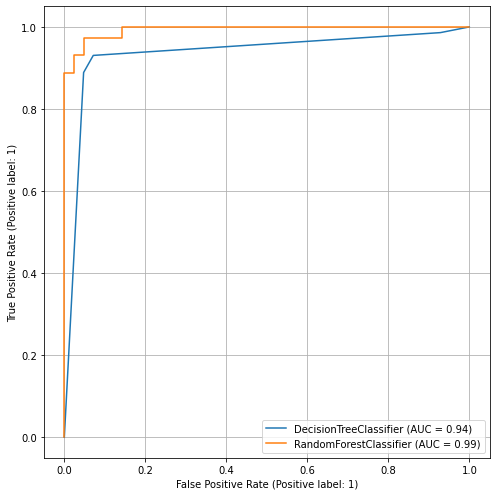

In [36]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plot_roc_curve(tree, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

plt.tight_layout()
plt.grid()
plt.show()